In [1]:
# Imports
from env import host, user, password
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
np.random.seed(42)

# Initial data pull and looking at / seeking to understand data

In [ ]:
# initial sql query 
df = w.get_zillow_data()

In [ ]:
df.head()

In [ ]:
#rename columns to something less unwieldy
df.columns = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'year_built', 'tax_amount', 'county']

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.bedrooms.value_counts(dropna=False)

In [ ]:
df.bathrooms.value_counts(dropna=False)

In [ ]:
df.square_feet.value_counts()

In [ ]:
df.tax_value.sort_values()

In [ ]:
(df.tax_value % 1).sum()

In [ ]:
# decided to drop all nulls since it was only ~1% of data
# -- actually only .6% of data because some rows had multiple nulls
df = df.dropna()

In [ ]:
df.shape

In [ ]:
# most columns can/should be integers; exception was bathroom_cnt which I left as a float
for col in df.columns [df.columns != 'bathrooms']:
#     print (col)
    df[col] = df[col].astype(int)

In [ ]:
# decided fips should really be a string to better represent a categorical variable
df.county = df.county.map({6037: 'LA', 6059: 'Orange', 6111: 'Ventura'})

In [ ]:
df.head()

# Acquire Summary
- combined acquire and clean_up code into wrangle_zillow (not yet split)

In [ ]:
df = w.wrangle_zillow()

# Visualization of univariate variables

In [ ]:
df.info()

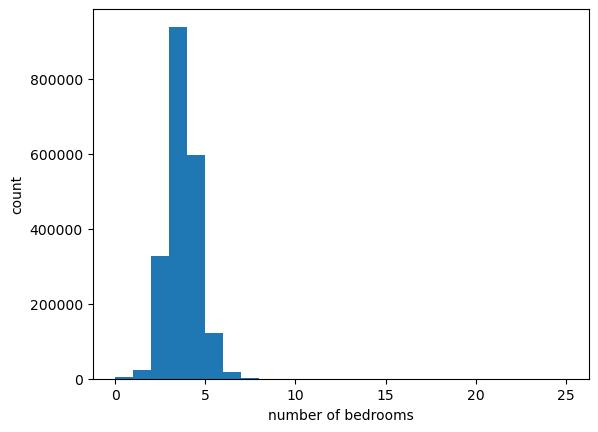

In [18]:
bins_ = range(0,26)
plt.hist(df.bedrooms, bins=bins_)
plt.ylabel('count')
plt.xlabel('number of bedrooms')
plt.show()

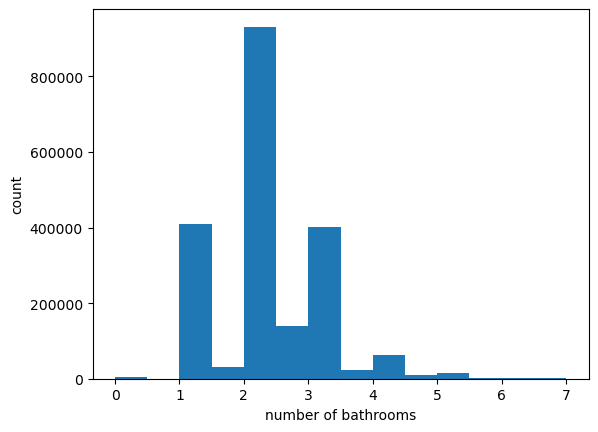

In [21]:
bins_ = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
plt.hist(df.bathrooms, bins=bins_)
plt.ylabel('count')
plt.xlabel('number of bathrooms')
plt.show()

In [ ]:
sf_bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
plt.hist(df.square_feet, bins=sf_bins)
plt.ylabel('count')
plt.xlabel('square feet')
plt.show()

In [ ]:
tax_value_cnt_bins = range(0,1_000_000,5000)
plt.hist(df.tax_value, bins=tax_value_cnt_bins)
plt.ylabel('count')
plt.xlabel('tax value')
plt.show()

In [ ]:
year_bins = range(1870,2025,5)
plt.hist(df.year_built, bins=year_bins)
plt.ylabel('count')
plt.xlabel('year built')
plt.show()

In [ ]:
tax_amt_range = range(0,31000,1000)
plt.hist(df.tax_amount, bins=tax_amt_range)
plt.ylabel('count')
plt.xlabel('tax amount')
plt.show()

In [ ]:
df.county.value_counts()

In [ ]:
# fips is more of a categorical variable; casting it as a string made it work better with histplot
# fips has only 3 unique values: 6037 ('LA'), 6059 ('Orange') , 6111 ('Ventura')
sns.histplot(data=df.county)
# plt.ylabel('count')
# plt.xlabel('fips')
plt.show()

In [ ]:
# I wasn't supposed to do this until after splitting!
# mean values for each column broken down by fips code
# for fip in df.fips.unique():
#     for col in df.drop(columns=['bedrooms','bathrooms','year_built','fips']).columns:
#         print(f'{fip}   mean {col}: {df[df.fips == fip][col].mean()}')
#         print(f'{fip} median {col}: {df[df.fips == fip][col].median()}')
#     print()

In [ ]:
# boxplots for all numerica columns (everything but fips)
for col in (df.drop(columns='county').columns):
    print (col)
    sns.boxplot(data=df, x=col)
    plt.show()
    

In [ ]:
# After visualization, I've decided to drop some outliers
# - square_feet> 25_000 AND the top 5% of tax_values
# df = df [df.square_feet < 25_000]

In [ ]:
# df = df [df.tax_value < df.tax_value.quantile(.95)]

# Summary of initial look at data
- 2152863 rows prior to cleaning
- 2033172 rows after cleaning
- nulls represented < 1% of data, so I removed them
- 7 columns: 6 numeric, 1 categorical
- changed all numeric columns to int except bathrooms which stayed float
- one numeric column, fips, is actually categorical, and it has 3 unique values: 6037, 6059, 6111
    - fips represents a region code akin to zip code (fips stands for federal information processing system)
    - 6037 == '06037' which is Los Angeles County in CA
    - 6059 == '06059' which is Orange County, CA
    - 6111 == '06111' which is Ventura County, CA

- each row is a "Single Family Residential" property from a 2017 Zillow database
- each column is an attribute of that house. All columns are numeric
- most numeric columns have normally distributed values with right skew (right tails, mean greater than median)
    - which indicates a smaller number of higher values (square feet, tax_value, etc.)
    - which also indicates that a small number of these properties are big/high-value "mansion" type houses
- fips distribution:
    - 1.4 M homes in 6037 (LA County)
    -  .6 M homes in 6059 (Orange County) 
    -  .15M homes in 6111 (Ventura County)

- Outliers
- I chose to discard rows with square_feet >= 25,000
    - there were two homes with ludicrous high square_footages
- I also chose to discard rows that were in the top 5% of tax_value
    - there were some very expensive homes compared to most homes)

In [2]:
df = w.wrangle_zillow()

csv file found and read


In [3]:
df.shape

(2033172, 9)

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

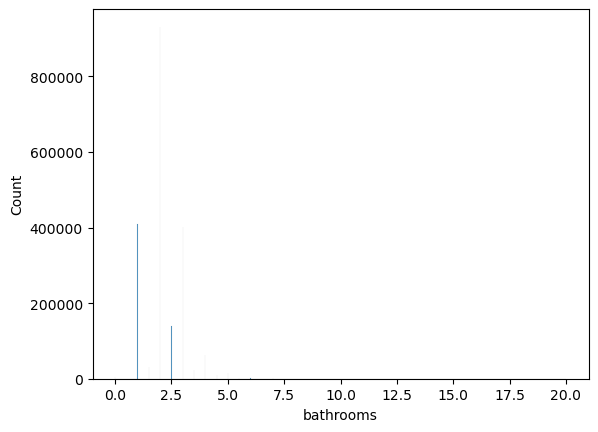

In [16]:
# I'm going to look at making a column has_half_bath
sns.histplot(df.bathrooms)

In [ ]:
# train, validate, test = w.split_function(df)